In [5]:
#LAMA KHALED 1805751
#SHAHAD SHAMSAN 1808718

# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
#using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

#using sklearn
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Read the dataset and print head.

In [6]:
df = pd.read_csv("D:\Company_data.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Get information about the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### check the summary statistics of this dataset

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


### Using pairplot to visualize the data

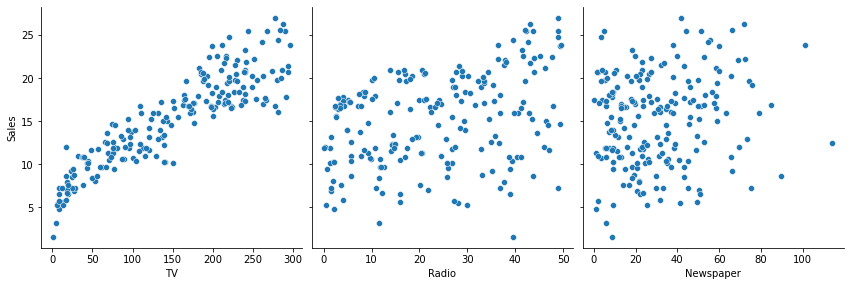

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

### Check the correlation using the heatmap.

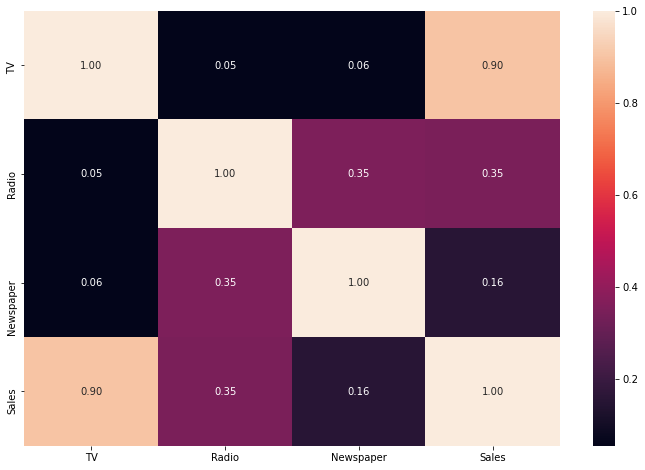

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f' )
plt.show()

### Model Building

### Split the dataset

In [11]:
# separate the dependent and indepedent variable
Y = df['Sales']
X = df.drop(columns = {'Sales'})

# add the intercept term
X = sm.add_constant(X)

In [12]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

### Check for multicollinearity.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

     feature       VIF
0      const  6.443781
1         TV  1.004497
2      Radio  1.200214
3  Newspaper  1.203844


### Creating linear regression model using statsmodels OLS

In [14]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     405.2
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           1.36e-67
Time:                        22:18:33   Log-Likelihood:                -272.35
No. Observations:                 140   AIC:                             552.7
Df Residuals:                     136   BIC:                             564.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6614      0.368     12.650      0.000       3.933       5.390
TV             0.0550      0.002     32.747      0.000       0.052       0.058
Radio          0.1025      0.010      9.801      0.000       0.082       0.123
Newspaper     -0.0015      0.007     -0.203      0.839      -0.016       0.013
==============================================================================
Omnibus:                       15.370   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.876
Skew:                          -0.526   Prob(JB):                     2.41e-06
Kurtosis:                       4.824   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Create the model after dropping the column with high p value >0.05

In [15]:
# create the model after dropping Newspaper
Y = df['Sales']
X = df.drop(columns = {'Sales','Newspaper'})
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     612.0
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           4.95e-69
Time:                        22:18:33   Log-Likelihood:                -272.37
No. Observations:                 140   AIC:                             550.7
Df Residuals:                     137   BIC:                             559.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6390      0.350     13.240      0.000       3.946       5.332
TV             0.0550      0.002     32.903      0.000       0.052       0.058
Radio          0.1016      0.010     10.677      0.000       0.083       0.120
==============================================================================
Omnibus:                       14.841   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.663
Skew:                          -0.512   Prob(JB):                     4.41e-06
Kurtosis:                       4.783   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking model performance:RMSE,MAE

In [16]:

 # RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_performance(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ]
            }
        )
    )


# Checking model performance
model_performance(model2, X_train, X_test,y_train,y_test)  

    Data      RMSE       MAE
0  Train  1.693160  1.270892
1   Test  1.537695  1.191975


### Print  coefficients of model2

In [17]:
coef = model2.params
coef

const    4.639009
TV       0.055005
Radio    0.101644
dtype: float64

### Write the equation of the fit

In [18]:
# Let us write the equation of the fit
Equation = "Sales ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Sales =	( 4.639008926907953 ) *  const + ( 0.0550047882995188 ) *  TV + ( 0.10164375816034754 ) *  Radio + 

### Building Decision Tree

In [19]:
#importing Decision tree regressor using sklearn

from sklearn.tree import DecisionTreeRegressor

In [20]:
# splitting the data in 70:30 ratio of train to test data
# separate the dependent and indepedent variable
Y1 = df['Sales']
X1 = df.drop(columns = {'Sales'})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30 , random_state=1)

In [21]:
#defining the Descision tree regressor
dt=DecisionTreeRegressor(min_samples_split=2)

#Fitting Descision Tree regressor to train dataset
dt.fit(X_train1,y_train1)

DecisionTreeRegressor()

### Checking descision tree performance on the train and test dataset

In [22]:
model_performance(dt, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE
0  Train  0.000000  0.000000
1   Test  1.400476  1.016667


### Plot the tree.

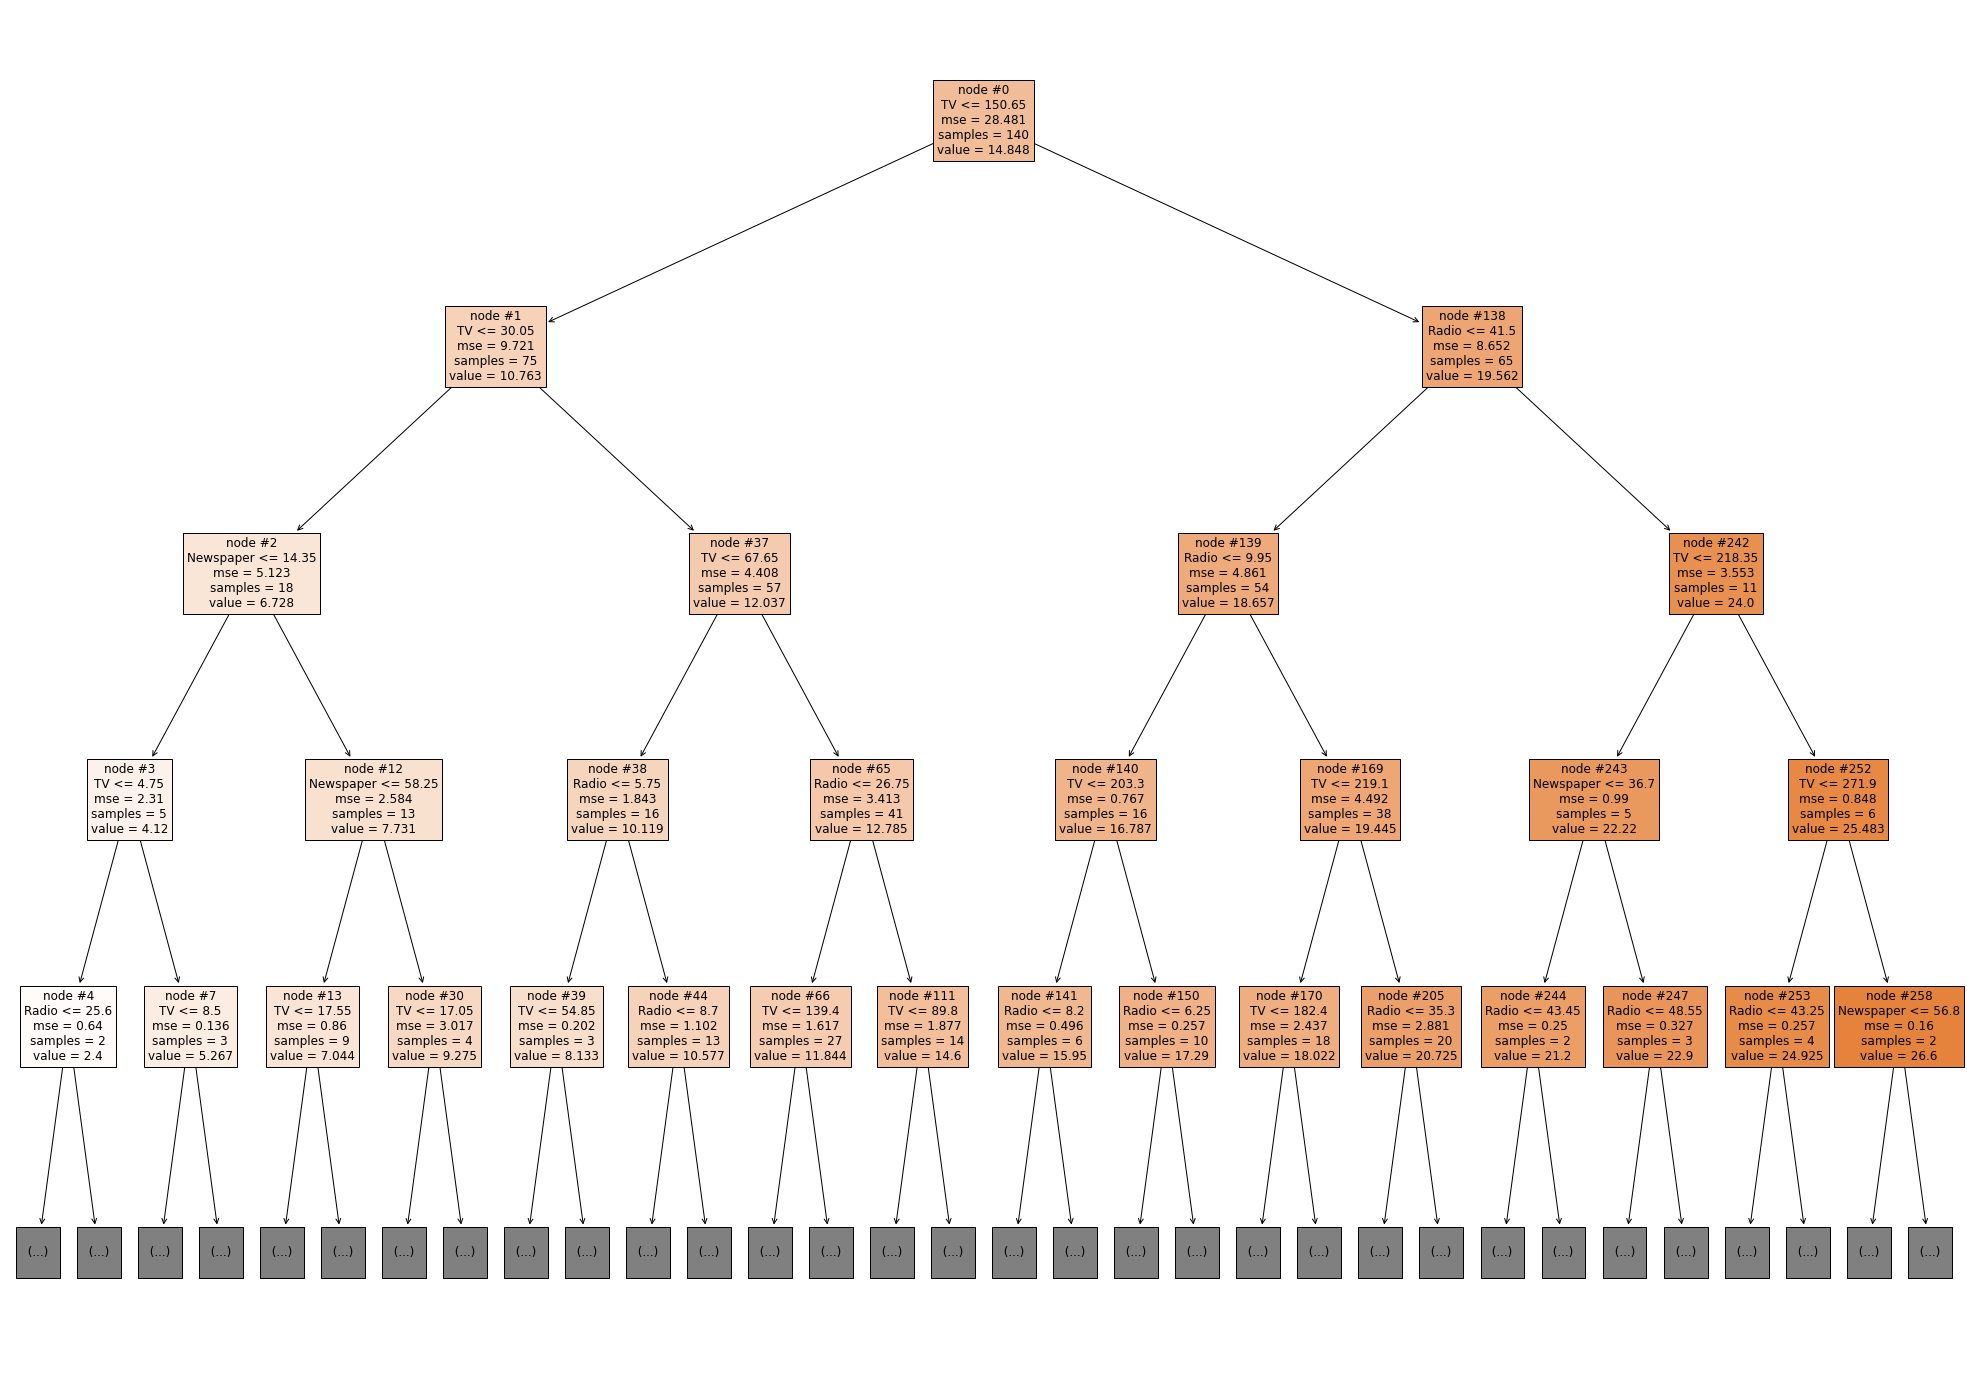

In [23]:
from sklearn.tree import plot_tree
features = list(X1.columns)

plt.figure(figsize=(35,25))
plot_tree(dt, max_depth=4, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

### Building Random Forest

In [24]:
#importing random forest regressor usinf sklearn

from sklearn.ensemble import RandomForestRegressor

In [25]:
#defining the Random forest regressor
rf=RandomForestRegressor(n_estimators=200,max_depth=4,min_samples_split=2)

#Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model. 

#fitting the model
rf.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=4, n_estimators=200)

### Checking random forest performance.

In [26]:
model_performance(rf, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE
0  Train  0.970173  0.761441
1   Test  1.052988  0.842806


### Comparing results for 3 models

In [27]:
print("Linear Regression")
model_performance(model2, X_train, X_test,y_train,y_test)
print("Decision tree")
model_performance(dt, X_train1, X_test1,y_train1,y_test1)
print("Random Forest")
model_performance(rf, X_train1, X_test1,y_train1,y_test1)  

Linear Regression
    Data      RMSE       MAE
0  Train  1.693160  1.270892
1   Test  1.537695  1.191975
Decision tree
    Data      RMSE       MAE
0  Train  0.000000  0.000000
1   Test  1.400476  1.016667
Random Forest
    Data      RMSE       MAE
0  Train  0.970173  0.761441
1   Test  1.052988  0.842806
